Notebook to create all the rasters with the maximum wind gust over the period of each storm in Europe land

In [1]:
import os
import sys
import pandas as pd
import xarray as xr

operating_system = 'mac'

if operating_system == 'win':
    os.chdir('C:/Users/fabau/OneDrive/Documents/GitHub/master-project-cleaned/')
elif operating_system == 'curnagl':
    os.chdir('/work/FAC/FGSE/IDYST/tbeucler/default/fabien/repos/cleaner_version/')
else:
    os.chdir('/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/')

# Add the path to the custom library
custom_library_path = os.path.abspath('util/wind_map/')
sys.path.append(custom_library_path)

import wind_map

In [2]:
input_path = '/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ECMWF/ERA5/SL/'
variable = 'instantaneous_10m_wind_gust'
storm_dates = pd.read_csv('pre_processing/tracks/storm_dates.csv', 
                          delimiter = ',')  
output_file = 'pre_processing/maps/wind_maps'

In [3]:
# index represents the year, 2003 and 2018 are missing because no storms were recorded / detected

years = [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
         2001, 2002, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
         2012, 2013, 2014, 2015, 2016, 2017, 2019, 2020]
for index in years:
    print('Processing year', index)
    wind_map.to_tiff_v2(variable, storm_dates, input_path, output_file, index, level=0)

Processing year 1990
processing completed for storm number 0  to  7
Processing year 1991
processing completed for storm number 8  to  10
Processing year 1992
processing completed for storm number 11  to  17
Processing year 1993
processing completed for storm number 18  to  20
Processing year 1994
processing completed for storm number 21  to  23
Processing year 1995
processing completed for storm number 24  to  24
Processing year 1996
processing completed for storm number 25  to  29
Processing year 1997
processing completed for storm number 30  to  32
Processing year 1998
processing completed for storm number 33  to  35
Processing year 1999
processing completed for storm number 36  to  39
Processing year 2000
processing completed for storm number 40  to  41
Processing year 2001
processing completed for storm number 42  to  44
Processing year 2002
processing completed for storm number 45  to  45
Processing year 2004
processing completed for storm number 46  to  47
Processing year 2005
pr

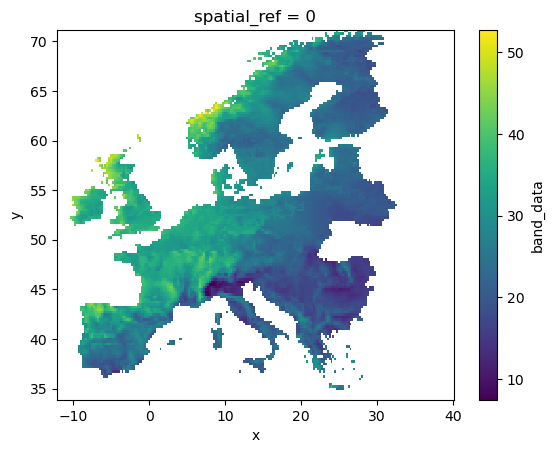

In [4]:
# combine all tiffs into one file with the maximum wind gust speed at each pixel

rasters = xr.open_mfdataset('data/time_series_rasters_storms_15h/*.tif', 
                            engine='rasterio', 
                            combine='nested', 
                            concat_dim='band')

max_all_storms = rasters['band_data'].max(dim='band')
#max_all_storms.plot()
#max_all_storms

i10fg = max_all_storms
 
i10fg = i10fg.rio.set_spatial_dims(x_dim='x', y_dim='y')
i10fg.rio.crs
i10fg.rio.write_crs("epsg:4326", inplace=True)
i10fg.rio.to_raster("data/time_series_rasters_storms_15h/max_all_storms.tif")

i10fg.plot.imshow()